# Task 2
## Instructions
Given a list of integer numbers, look for a negative number in the list. Consider an appropriate number of qubits and explain why your proposal is valid for all kinds of numbers in case.

Author: MEng. Jordi F. González Contreras

### Solution
Create a function that identifies if an integer is negative. 

In [1]:
from qiskit import QuantumCircuit
from math import pi
from qiskit.visualization import circuit_drawer

def encode_integer_to_quantum_state(integer_to_check):
    #Encode the integer into qubits
    # Determine the number of qubits required to represent the integer.
    num_qubits = len(bin(abs(integer_to_check))[2:])
    
    # Determine the number of qubits required to represent the sign of the integer.
    num_qubits_sign = num_qubits + (1 if integer_to_check < 0 else 0)
    
    # Create a quantum circuit with the required number of qubits.
    qc = QuantumCircuit(num_qubits_sign)
    
    # Validate the number of qubits required to represent the integer.
    # If an additional qubit is needed to represent the sign, then it's a negative integer.
    if num_qubits_sign > num_qubits:
        # For negative numbers, apply Rx gate to rotate pi radians in X axis to the first qubit to represent the sign.
        qc.rx(pi/2, num_qubits_sign - 1)
        print(f"The integer {integer_to_check} is negative.")
    
    # Transform the integer into a binary array.
    bit_array = [int(x) for x in bin(abs(integer_to_check))[2:]]
    
    # Apply X gate to the qubits that represent the integer.
    for index, bit in enumerate(reversed(bit_array)):
        if bit == 1:
            qc.x(index)
    # Return the quantum circuit
    return qc



Unit testing for a number.

The integer -2 is negative.


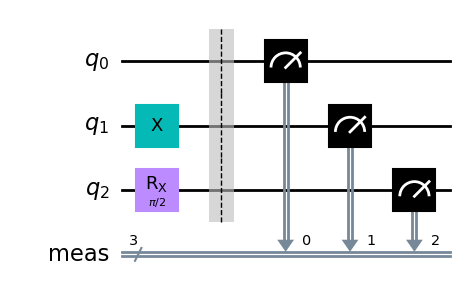

In [2]:
# Example usage:
integer_to_check = -2
quantum_circuit = encode_integer_to_quantum_state(integer_to_check)
# Measure the qubits
quantum_circuit.measure_all()
# Draw the quantum circuit (optional)
circuit_drawer(quantum_circuit, output="mpl")

C:\TEMP\ipykernel_31396\1064500804.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(assemble(quantum_circuit))


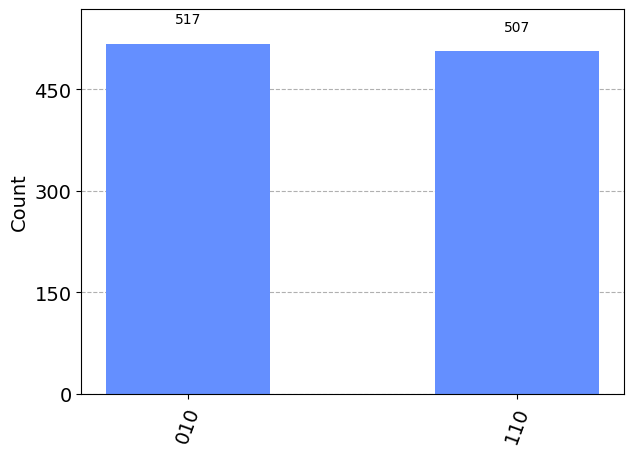

In [3]:
from qiskit import Aer, assemble
from qiskit.visualization import plot_histogram

#Simulate the quantum circuit in a quantum computer simulator.
simulator = Aer.get_backend('qasm_simulator')
# Execute the quantum circuit on the simulator.
job = simulator.run(assemble(quantum_circuit))
# Get the result counts.
result_counts = job.result().get_counts()
# Plot the result counts.
plot_histogram(result_counts)

The histogram provides a visual insight into whether the number is negative or positive. When the most significant bit can take on both 0 and 1 values, represented by two distinct bars in the histogram following measurement, it indicates that the number is negative. Otherwise, when only one bar is observed, it signifies that the number is positive. This graphical representation simplifies the identification of the number's sign.

In [4]:
#Extend this function to iterate into a list of integers
integer_list = [2, 3, 4, -5, 6, 7, 8, 9, 10]
for integer_to_check in integer_list:
    quantum_circuit = encode_integer_to_quantum_state(integer_to_check)

The integer -5 is negative.


## Conclusion
As can be seen in the histogram, when the input is a negative value, we perform a rotation on the X-axis by π/2. This results in the first qubit, when measured, having a 50% probability of collapsing to 0 or 1. This feature can serve as a visual indicator to identify whether a number is negative, as the histogram will show two bars. On the other hand, when the number is positive, only the encoding of the number into qubits is performed, and upon measurement, a single peak appears in the histogram.